In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

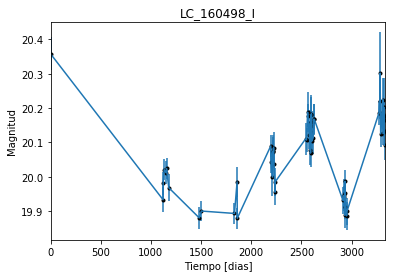

In [2]:
data = np.genfromtxt('LC_160498_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_160498_I')
plt.savefig("LC_160498_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

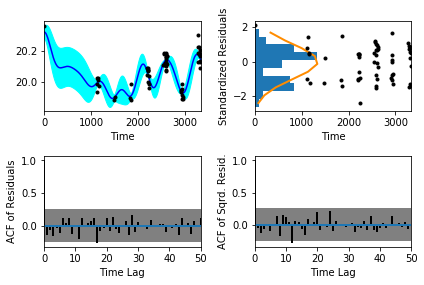

In [5]:
sample.assess_fit()

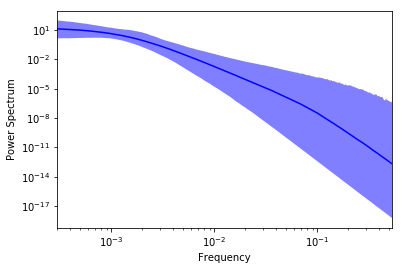

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

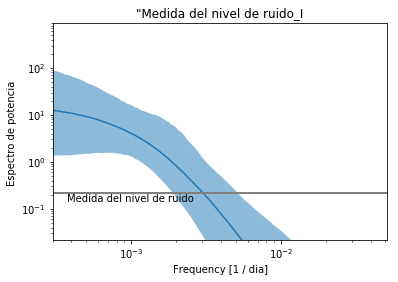

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_160498_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_160498_I')

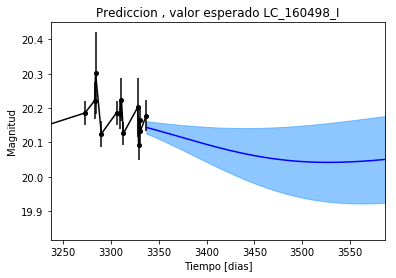

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_160498_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_160498_I')

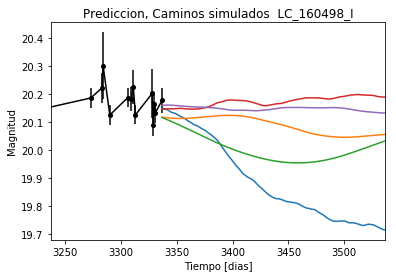

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_160498_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


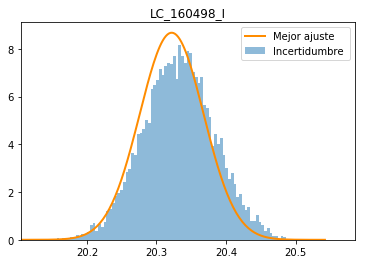

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_160498_I')
plt.savefig("Mejor_ajuste_LC_160498_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_160498_I')

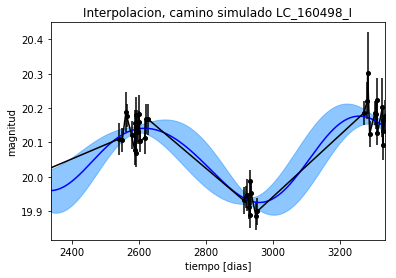

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_160498_I')

Text(0.5,1,'Interpolacion, camino simulado LC_160498_I')

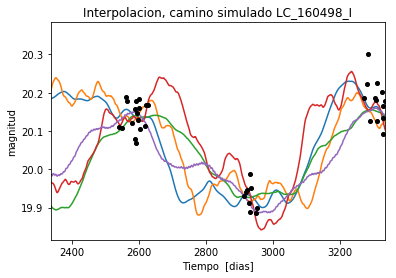

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_160498_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 2007.94884584
Median: 0.00611158829817
Standard deviation: 0.180378434561
68% credibility interval: [ 0.00067089  0.13808404]
95% credibility interval: [  3.42443430e-04   6.95984927e-01]
99% credibility interval: [  3.08564881e-04   9.74034772e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 848.139437029
Median: 0.00141901149366
Standard deviation: 0.0861026591807
68% credibility interval: [ 0.00046079  0.01981209]
95% credibility interval: [ 0.00031773  0.26513162]
99% credibility interval: [  3.02325909e-04   5.98017239e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 636.408059859
Median: 0.00775386146065
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1410.17393418
Median: 119.352667488
Standard deviation: 1.60415472159
68% credibility interval: [ 117.47133961  120.46858032]
95% credibility interval: [ 115.01178318  121.05441511]
99% credibility interval: [ 112.93968347  121.32831902]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 629.173684395
Median: 0.427887289802
Standard deviation: 1.96170437303
68% credibility interval: [ 0.0371922   3.22027343]
95% credibility interval: [ 0.01359612  6.58407368]
99% credibility interval: [ 0.00984115  9.58823574]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1004.53987701
Median: 0.23082063085
Standard deviation: 8.89535793968
68% credibility interval: [ 0.00776081  6.33211543]
95% credibility interval: [  4.40715780e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1104.06325805
Median: 7.18637415011e-49
Standard deviation: 2.84492343345e+40
68% credibility interval: [  5.40393659e-112   1.57478033e-005]
95% credibility interval: [  9.13159377e-235   4.36461047e+008]
99% credibility interval: [  1.29104211e-250   3.10031769e+030]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2159.54298811
Median: 20.0585897697
Standard deviation: 0.0963158161786
68% credibility interval: [ 19.99096629  20.14530071]
95% credibility interval: [ 19.89744676  20.27794278]
99% credibility interval: [ 19.78614412  20.40926727]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 538.327427452
Median: 0.00222656996329
Standard deviation: 0.245377225326
68% credibility interval: [ 0.          0.33646077]
95% credibility interval: [ 0.         0.8906573]
99% credibility interval: [ 0.          1.00873721]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 538.327427452
Median: 0.00222656996329
Standard deviation: 0.245377225326
68% credibility interval: [ 0.          0.33646077]
95% credibility interval: [ 0.         0.8906573]
99% credibility interval: [ 0.          1.00873721]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 821.542066933
Median: 0.0
Standard deviation: 0.000501501548567
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1410.17393418
Median: 119.352667488
Standard deviation: 1.60415472159
68% credibility interval: [ 117.47133961  120.46858032]
95% credibility interval: [ 115.01178318  121.05441511]
99% credibility interval: [ 112.93968347  121.32831902]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1275.47425078
Median: 0.0277657178058
Standard deviation: 0.0397389706538
68% credibility interval: [ 0.01580839  0.05516335]
95% credibility interval: [ 0.00979761  0.13513013]
99% credibility interval: [ 0.00722075  0.26336033]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3373.84727615
Median: 0.982973627462
Standard deviation: 0.147937747627
68% credibility interval: [ 0.847727    1.14148011]
95% credibility interval: [ 0.74643101  1.32541276]
99% credibility interval: [ 0.68768172  1.45400648]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 577.632722829
Median: 4.45445023901e-05
Standard deviation: 0.119743481595
68% credibility interval: [  7.20170899e-07   1.78406531e-03]
95% credibility interval: [  1.53265982e-14   2.86360775e-02]
99% credibility interval: [  5.38145857e-35   7.26846388e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 2007.94884584
Median: (-0.0384002417986-5.79806273255j)
Standard deviation: 1.91349931399
68% credibility interval: [-0.86760759+0.j         -0.00421530-0.00624453j]
95% credibility interval: [ -4.37300227e+00+0.j          -2.15163552e-03-0.21887082j]
99% credibility interval: [ -6.12004097e+00+0.j          -1.93877033e-03-2.90423177j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 848.139437029
Median: (-0.0089159121677+0j)
Standard deviation: 1.63391392655
68% credibility interval: [-0.12448301+0.01917425j -0.00289521+0.j        ]
95% credibility interval: [-1.66587110+3.00228341j -0.00199634+0.08688577j]
99% credibility interval: [ -3.75745313e+00+0.99839178j  -1.89956971e-03+0.00998695j]
Posterior summary for para